In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/CDAC_Project/Skin Disease Prediction/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-8.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthom

In [3]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import random as rm

In [4]:
train_dir="/content/train"
test_dir="/content/test"

In [5]:
test_list=os.listdir(test_dir) 
#len test_list 
train_list=os.listdir(train_dir)
#len(train_list) 23

#SORTING THEM FOR REFERENCE
train_list.sort()
test_list.sort()
#viewing items
#test_list[0:5]

print(train_list)
print(test_list)
# train_list.pop(0)
# print(train_list)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Le

In [6]:
count_train = []
folder_path = ['/content/train/Acne and Rosacea Photos',
               "/content/train/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions",
               "/content/train/Atopic Dermatitis Photos",
               "/content/train/Bullous Disease Photos",
               "/content/train/Cellulitis Impetigo and other Bacterial Infections",
               "/content/train/Eczema Photos",
               "/content/train/Exanthems and Drug Eruptions",
               "/content/train/Hair Loss Photos Alopecia and other Hair Diseases",
               "/content/train/Herpes HPV and other STDs Photos",
               "/content/train/Light Diseases and Disorders of Pigmentation",
               "/content/train/Lupus and other Connective Tissue diseases",
               "/content/train/Melanoma Skin Cancer Nevi and Moles",
               "/content/train/Nail Fungus and other Nail Disease",
               "/content/train/Poison Ivy Photos and other Contact Dermatitis",
               "/content/train/Psoriasis pictures Lichen Planus and related diseases",
               "/content/train/Scabies Lyme Disease and other Infestations and Bites",
               "/content/train/Seborrheic Keratoses and other Benign Tumors",
               "/content/train/Systemic Disease",
               "/content/train/Tinea Ringworm Candidiasis and other Fungal Infections",
               "/content/train/Urticaria Hives",
               "/content/train/Vascular Tumors",
               "/content/train/Vasculitis Photos",
               "/content/train/Warts Molluscum and other Viral Infections"]


for paths in folder_path:
    count = 0
    for file_path in os.scandir(paths):
        if file_path.is_file():
            count = count + 1
    count_train.append(count)
print(count_train)

[840, 1149, 489, 448, 288, 1235, 404, 239, 405, 568, 420, 463, 1040, 260, 1405, 431, 1371, 606, 1300, 212, 482, 416, 1086]


In [7]:
image_counter = dict(zip(train_list,count_train))
image_counter

{'Acne and Rosacea Photos': 840,
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions': 1149,
 'Atopic Dermatitis Photos': 489,
 'Bullous Disease Photos': 448,
 'Cellulitis Impetigo and other Bacterial Infections': 288,
 'Eczema Photos': 1235,
 'Exanthems and Drug Eruptions': 404,
 'Hair Loss Photos Alopecia and other Hair Diseases': 239,
 'Herpes HPV and other STDs Photos': 405,
 'Light Diseases and Disorders of Pigmentation': 568,
 'Lupus and other Connective Tissue diseases': 420,
 'Melanoma Skin Cancer Nevi and Moles': 463,
 'Nail Fungus and other Nail Disease': 1040,
 'Poison Ivy Photos and other Contact Dermatitis': 260,
 'Psoriasis pictures Lichen Planus and related diseases': 1405,
 'Scabies Lyme Disease and other Infestations and Bites': 431,
 'Seborrheic Keratoses and other Benign Tumors': 1371,
 'Systemic Disease': 606,
 'Tinea Ringworm Candidiasis and other Fungal Infections': 1300,
 'Urticaria Hives': 212,
 'Vascular Tumors': 482,
 'Vasculitis Photos': 416,

In [8]:
train_list_ = []
test_list_ = []

In [9]:
for key in image_counter:
    if image_counter[key] >= 1300:
        train_list_.append(key)
train_list_

['Psoriasis pictures Lichen Planus and related diseases',
 'Seborrheic Keratoses and other Benign Tumors',
 'Tinea Ringworm Candidiasis and other Fungal Infections']

In [10]:
# train_list_ = rm.sample(train_list,k=10)
test_list_ = train_list_

In [ ]:
# for i in train_list[0:10]:
#     train_list_.append(i)
# for j in test_list[0:10]:
#     test_list_.append(j)

In [11]:
print(test_list_)
print(train_list_)

['Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Tinea Ringworm Candidiasis and other Fungal Infections']
['Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Tinea Ringworm Candidiasis and other Fungal Infections']


In [ ]:
print(len(train_list_),len(test_list_))

3 3


In [ ]:
# train_list_mod=['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Eczema Photos', 'Nail Fungus and other Nail Disease', 'Psoriasis pictures Lichen Planus and related diseases']

In [ ]:
# len(train_list_mod)

In [12]:
def data_dictionary():
    path_train=train_dir
    path_test=test_dir
    list_train= train_list_   #os.listdir(path_train) 
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+"/"+i
        path_disease_test=path_test+"/"+i
        image_list_train=os.listdir(path_disease_train)
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k) 
        for m in image_list_test :
            img_path_test=path_disease_test+"/"+m
            test_dictionary["image_path"].append(img_path_test)
            test_dictionary['target'].append(k)
        k+=1 
    test_df=pd.DataFrame(test_dictionary)
    train_df=pd.DataFrame(train_dictionary)
    # print(test_df.head(5))
    # print(train_df.head(5))
        
    return  train_df,test_df

In [13]:
def load_data(input_size=(240,240)):
    images=[]
    images2=[]
    train_df,test_df=data_dictionary()
    for i in train_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images.append(img)
    y_train=np.asarray(train_df['target'])
    x_train=np.asarray(images)
    for i in test_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images2.append(img)
    y_test=np.asarray(test_df['target'])
    x_test=np.asarray(images2)
    return x_train,x_test,y_train,y_test



In [14]:
x_train,x_test,y_train,y_test=load_data(input_size=(240,240))

In [15]:
from tensorflow.keras.applications import  VGG19
from tensorflow.keras.models import Model
from keras.applications.vgg19 import preprocess_input


In [16]:
vgg19 = VGG19(include_top=False,weights='imagenet')
# op_class = 10
# final = vgg19.output
# x = Flatten()(final)(x)
# x = Conv2D(32, (3,3),padding='valid',activation='relu')(x)
# x = Conv2D(256, (3,3),padding='same',activation='relu')(x)
# prediction = Dense(op_class, activation='softmax')(x)
# for layer in vgg19.layers:
#     layer.trainable = False
# vgg_model1 = Model(inputs=vgg19.input, outputs=prediction)
# vgg_model1.summary()
# train_img=preprocess_input(x_train)
# test_img=preprocess_input(x_test)
# features_train=vgg_model1.predict(train_img)
# features_test=vgg_model1.predict(test_img)
# features_train.shape
# features_test.shape
# num_train=x_train.shape[0]
# num_test=x_test.shape[0]
# print(num_train,num_test)
# x_train=features_train.reshape(num_train,4608)
# x_test=features_test.reshape(num_test,4608)
# vgg_model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
# vgg_model1.fit(x_train,y_train,batch_size=8,epochs=25,validation_data=(x_test,y_test))

80134624/80134624 [==============================] - 3s 0us/step


In [17]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [18]:
train_img=preprocess_input(x_train)
test_img=preprocess_input(x_test)
# num_train=x_train.shape[0]
# num_test=x_test.shape[0]

In [19]:
features_train=vgg19.predict(train_img)

128/128 [==============================] - 34s 189ms/step


In [20]:
features_test=vgg19.predict(test_img)

32/32 [==============================] - 9s 284ms/step


In [21]:
features_train.shape

(4076, 7, 7, 512)

In [22]:
features_test.shape

(1020, 7, 7, 512)

In [23]:
num_train=x_train.shape[0]
num_test=x_test.shape[0]

In [24]:
print(num_train,num_test)

4076 1020


In [25]:
x_train=features_train.reshape(num_train,25088)
x_test=features_test.reshape(num_test,25088)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [27]:
model=Sequential([ Dense(1024,activation='relu'),
                   Dense(512,activation='relu'),
                  Dense(256,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(10,activation='softmax')])

In [28]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'] )

In [29]:
model.fit(x_train,y_train,batch_size=4,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
1019/1019 [==============================] - 12s 8ms/step - loss: 1.7697 - accuracy: 0.5437 - val_loss: 0.9097 - val_accuracy: 0.6500
Epoch 2/25
1019/1019 [==============================] - 7s 7ms/step - loss: 0.7456 - accuracy: 0.7132 - val_loss: 0.8805 - val_accuracy: 0.6127
Epoch 3/25
1019/1019 [==============================] - 8s 8ms/step - loss: 0.5036 - accuracy: 0.8216 - val_loss: 0.8284 - val_accuracy: 0.7029
Epoch 4/25
1019/1019 [==============================] - 8s 7ms/step - loss: 0.3468 - accuracy: 0.8911 - val_loss: 0.8865 - val_accuracy: 0.7147
Epoch 5/25
1019/1019 [==============================] - 8s 8ms/step - loss: 0.2856 - accuracy: 0.9203 - val_loss: 1.6147 - val_accuracy: 0.6824
Epoch 6/25
1019/1019 [==============================] - 8s 8ms/step - loss: 0.3283 - accuracy: 0.9369 - val_loss: 1.2769 - val_accuracy: 0.6873
Epoch 7/25
1019/1019 [==============================] - 8s 7ms/step - loss: 0.1548 - accuracy: 0.9566 - val_loss: 1.7111 - val_accuracy

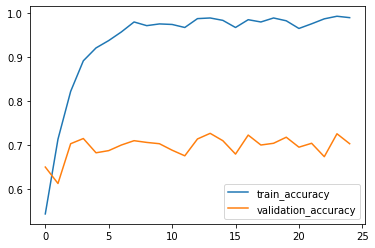

In [30]:
plt.plot(model.history.history['accuracy'],label="train_accuracy")
plt.plot(model.history.history['val_accuracy'],label="validation_accuracy")
plt.legend()
plt.show()


In [ ]:
    
def load_img(img_path):
    images=[]
    img=cv2.imread(img_path)
    img=cv2.resize(img,(240,240))
    images.append(img)
    x_test=np.asarray(images)
    test_img=preprocess_input(x_test)
    features_test=vgg19.predict(test_img)
    num_test=x_test.shape[0]
    f_img=features_test.reshape(num_test,25088)
    
    return f_img
    

In [ ]:
img=load_img("/content/test/Psoriasis pictures Lichen Planus and related diseases/08SebDermPrestern.jpg")

1/1 [==============================] - 0s 23ms/step


In [ ]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 96ms/step


2

In [ ]:
imag=load_img("/content/test/Seborrheic Keratoses and other Benign Tumors/20seborrheicKeratosisCrop.jpg")

1/1 [==============================] - 0s 35ms/step


In [ ]:
np.argmax(model.predict(imag))

1/1 [==============================] - 0s 21ms/step


1

In [ ]:
im = load_img("/content/test/Tinea Ringworm Candidiasis and other Fungal Infections/13intertrigo1219051.jpg")

1/1 [==============================] - 0s 23ms/step


In [ ]:
np.argmax(model.predict(im))

1/1 [==============================] - 0s 21ms/step


2

In [ ]:
im = load_img("/content/erythrodermic-psoriasis-image-credit-james-heilman-md-2010.jpg")

1/1 [==============================] - 0s 32ms/step


In [ ]:
np.argmax(model.predict(im))

1/1 [==============================] - 0s 23ms/step


0

In [ ]:
import joblib

In [ ]:
# filename="vgg16.sav"
# joblib.dump(vgg16,open(filename,'wb'))

In [ ]:
# vgg19=joblib.load("vgg16.sav")

In [ ]:
import pickle

In [32]:
# !mkdir -p saved_model
model.save('skin_model.hdf5')

In [ ]:
filename="skin_model.pkl"
joblib.dump(model,open(filename,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-02-28 06:55:52           64
config.json                                    2023-

In [ ]:
new_model = tf.keras.models.load_model('saved_model/skin_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 26,381,450
Trainable params: 26,381,450
Non-trainable params: 0
_________________________________________________________________
